# Proyecto Ingenias Fundacion YPF - TikTok

## Objetivo del trabajo: 
### "Desarrollar un modelo predictivo que pueda determinar si un video ofrece una opinión o contiene un reclamo"

Los usuarios de TikTok tienen la capacidad de presentar informes que identifican videos y comentarios que contienen reclamos de usuarios. Estos informes identifican contenido que necesita ser revisado por moderadores. El proceso genera una gran cantidad de informes de usuarios que son desafiantes de considerar de manera oportuna.
El conjunto de datos utilizado para esta entrega corresponde a la plataforma Kaggle. 

In [1]:
#importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## DESCRIPCIÓN DE LOS DATOS


In [2]:
#Lectura del archivo csv. Dataframe guardado como tiktok_dataset
tik_tok = pd.read_csv('tiktok_dataset.csv')
tik_tok

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19377,19378,NaN,7578226840,21,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19378,19379,NaN,6079236179,53,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19379,19380,NaN,2565539685,10,NaN,verified,under review,NaN,NaN,NaN,NaN,NaN
19380,19381,NaN,2969178540,24,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN


In [3]:
tik_tok.head() # nos permite ver las primeras 5 filas

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [4]:
#cantidad de filas y columnas
tik_tok.shape


(19382, 12)

In [5]:
tik_tok.info() # nos da información sobre nuestro dataframe 
          # como num. de columnas, filas, tipo de variables
   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [6]:
#valores faltantes
valores_faltantes = tik_tok.isnull().sum().sort_values(ascending = False) # contabiliza
        # datos faltantes y los ordena de mayor a menor
        # según la columna
valores_faltantes

claim_status                298
video_transcription_text    298
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
#                             0
video_id                      0
video_duration_sec            0
verified_status               0
author_ban_status             0
dtype: int64

In [7]:
#valores faltantes en % respecto al total (relativos)
valores_faltantes_rel =tik_tok.isna().sum()/tik_tok.shape[0] * 100
print(valores_faltantes_rel.sort_values(ascending = False) )
#El % de datos faltantes no superó el 2% en ningún caso

claim_status                1.537509
video_transcription_text    1.537509
video_view_count            1.537509
video_like_count            1.537509
video_share_count           1.537509
video_download_count        1.537509
video_comment_count         1.537509
#                           0.000000
video_id                    0.000000
video_duration_sec          0.000000
verified_status             0.000000
author_ban_status           0.000000
dtype: float64


Text(0.5, 1.0, 'Valores faltantes')

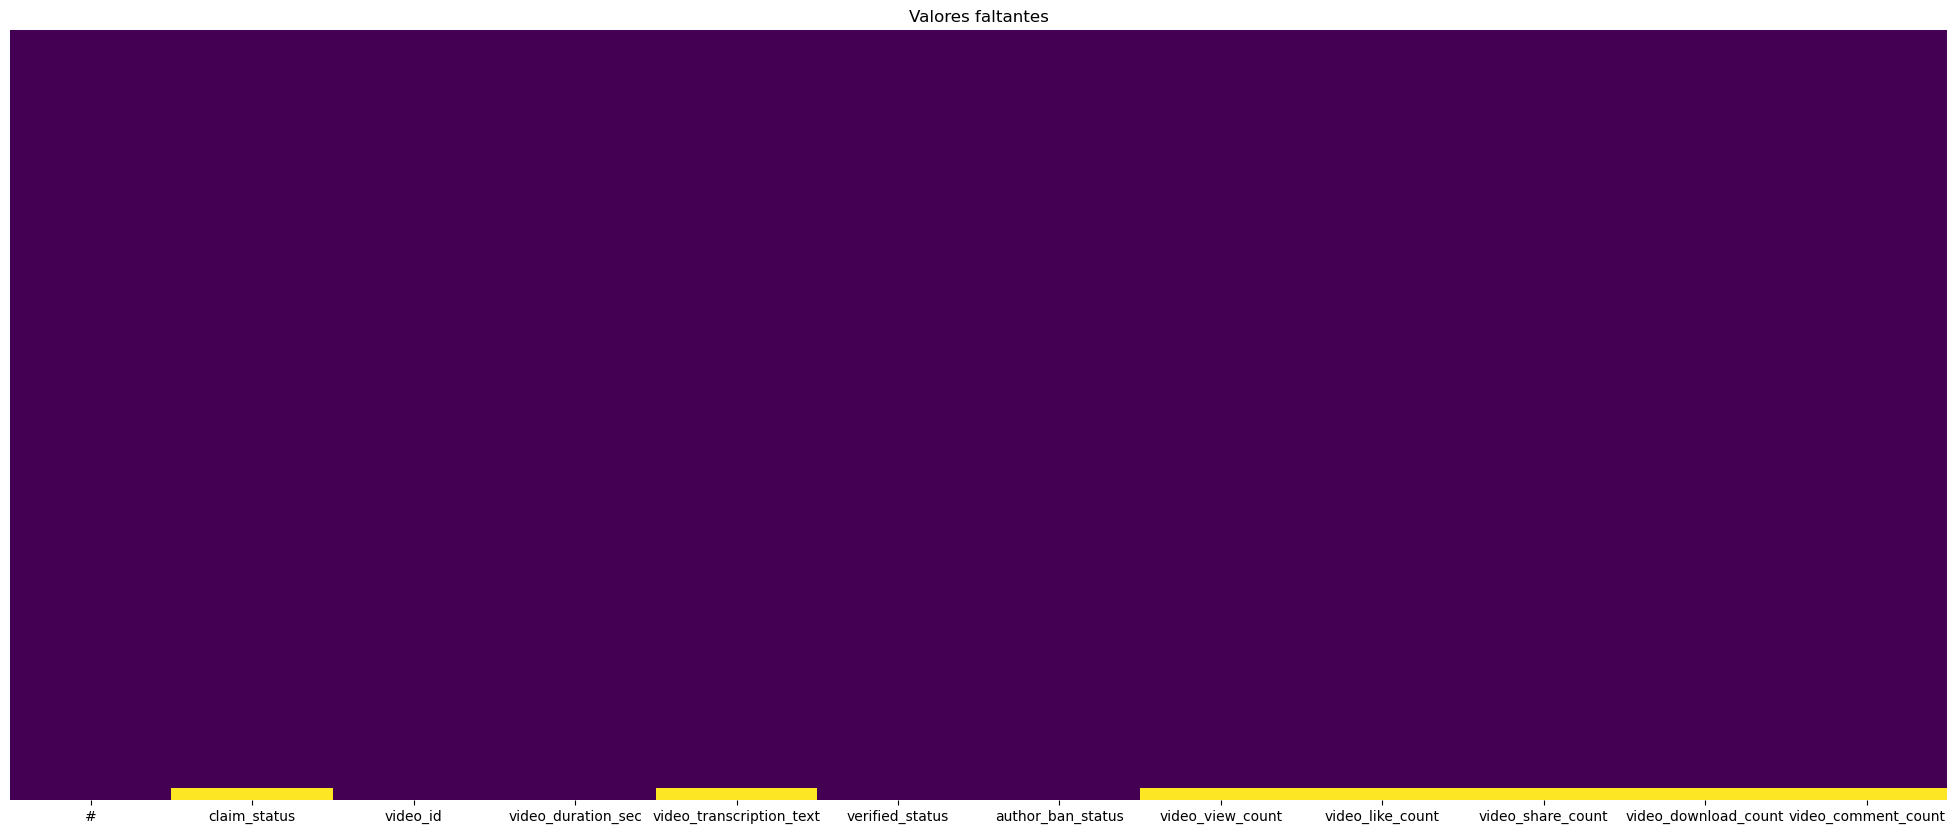

In [8]:
# visualización de valores faltantes
plt.rcParams['figure.figsize'] = (25,10)
sns.heatmap(tik_tok.isnull(),yticklabels = False, cbar = False , cmap = 'viridis')
plt.title("Valores faltantes")

In [9]:
# Elimina filas con valores faltantes
tik_tok = tik_tok.dropna(axis=0)

In [10]:
tik_tok.columns # nos devuelve el nombre de todas las columnas
                  

Index(['#', 'claim_status', 'video_id', 'video_duration_sec',
       'video_transcription_text', 'verified_status', 'author_ban_status',
       'video_view_count', 'video_like_count', 'video_share_count',
       'video_download_count', 'video_comment_count'],
      dtype='object')

In [11]:
#Renombrar columnas  
tik_tok = tik_tok.rename(columns={
    '#': 'ID',
    'claim_status': 'estado_reclamo',
    'video_id': 'ID_video',
    'video_duration_sec': 'duracion_video_seg',
    'video_transcription_text': 'transcripcion_video',
    'verified_status': 'estado_verificado',
    'author_ban_status': 'estado_bloqueo_autor',
    'video_view_count': 'suma_vistas_video',
    'video_like_count': 'suma_likes_video',
    'video_share_count': 'suma_share_video',
    'video_download_count': 'suma_descargas_video',
    'video_comment_count': 'suma_comentarios_video'
})

In [12]:
#Tipo de dato de cada columna

tik_tok.dtypes

ID                          int64
estado_reclamo             object
ID_video                    int64
duracion_video_seg          int64
transcripcion_video        object
estado_verificado          object
estado_bloqueo_autor       object
suma_vistas_video         float64
suma_likes_video          float64
suma_share_video          float64
suma_descargas_video      float64
suma_comentarios_video    float64
dtype: object

In [13]:
tik_tok.describe() # estadística descriptiva


,ID,ID_video,duracion_video_seg,suma_vistas_video,suma_likes_video,suma_share_video,suma_descargas_video,suma_comentarios_video
count,19084.000000,1.908400e+04,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9542.500000,5.624840e+09,32.423811,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5509.220604,2.537030e+09,16.226470,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4771.750000,3.425100e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9542.500000,5.609500e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14313.250000,7.840823e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19084.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [14]:
#distribución de reclamos
tik_tok['estado_reclamo'].value_counts(normalize=True)


claim      0.503458
opinion    0.496542
Name: estado_reclamo, dtype: float64

In [15]:
#Cantidad de videos incluidos en el dataset 
print(tik_tok['ID_video'].unique().shape)

(19084,)


# VISUALIZACIÓN DE LOS DATOS



In [16]:
#Importa las librerias matplotlib y seaborn
import matplotlib.pyplot as plt
import seaborn as sns

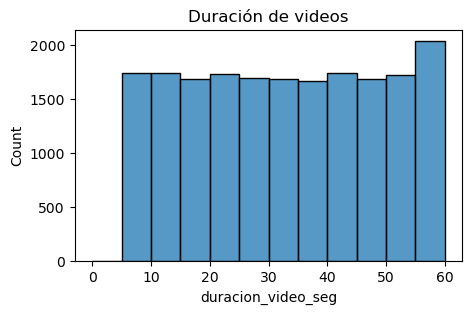

In [17]:
#Histograma con matplotlib
plt.figure(figsize=(5,3))
sns.histplot(tik_tok['duracion_video_seg'], bins=range(0,61,5))
plt.title('Duración de videos');

### Todos los videos son de una duración de entre 5 y 60 segundos y su distribucion es uniforme.

Text(0.5, 1.0, 'Vistas de Video')

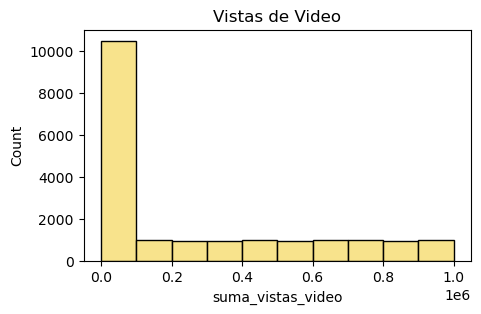

In [18]:
#Histograma con matplotlib

plt.figure(figsize=(5,3))
sns.histplot(tik_tok['suma_vistas_video'], bins=10, color="#F7DC6F", alpha=0.8)
plt.title('Vistas de Video')

### Esta variable tiene una distribución muy desigual, con más de la mitad de los videos recibiendo menos de 100,000 vistas. La distribución de las vistas mayores a 100,000 es uniforme.

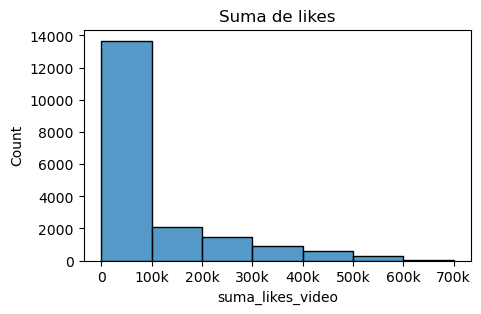

In [19]:
plt.figure(figsize=(5,3))
ax = sns.histplot(tik_tok['suma_likes_video'], bins=range(0,(7*10**5+1),10**5), color="#2980B9", alpha=0.8)
labels = [0] + [str(i) + 'k' for i in range(100, 701, 100)]
ax.set_xticks(range(0,7*10**5+1,10**5), labels=labels)
plt.title('Suma de likes');

### Hay muchos más videos con menos de 100,000 'me gusta' que videos con más. Sin embargo, en este caso, hay una disminución gradual, y los datos se sesgan hacia la derecha.

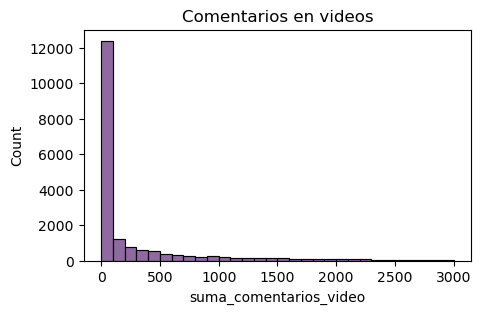

In [20]:
plt.figure(figsize=(5,3))
sns.histplot(tik_tok['suma_comentarios_video'], bins=range(0,(3001),100), color="#76448A", alpha=0.8)
plt.title('Comentarios en videos');

### Los videos se agrupan en la parte inferior del rango de valores para el recuento de comentarios de video. La mayoría de los videos tienen menos de 100 comentarios. La distribución muestra una fuerte asimetría hacia la derecha.

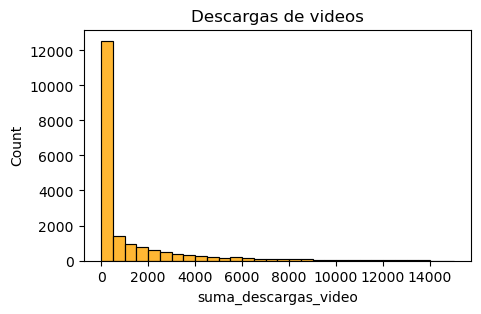

In [21]:
plt.figure(figsize=(5,3))
sns.histplot(tik_tok['suma_descargas_video'], bins=range(0,(15001),500), color="orange", alpha=0.8)
plt.title('Descargas de videos');

### La mayoría de los videos fueron descargados menos de 500 veces, pero algunos más de 12,000 veces. Una vez más, los datos muestran una fuerte asimetría hacia la derecha.

## Detección de outliers 

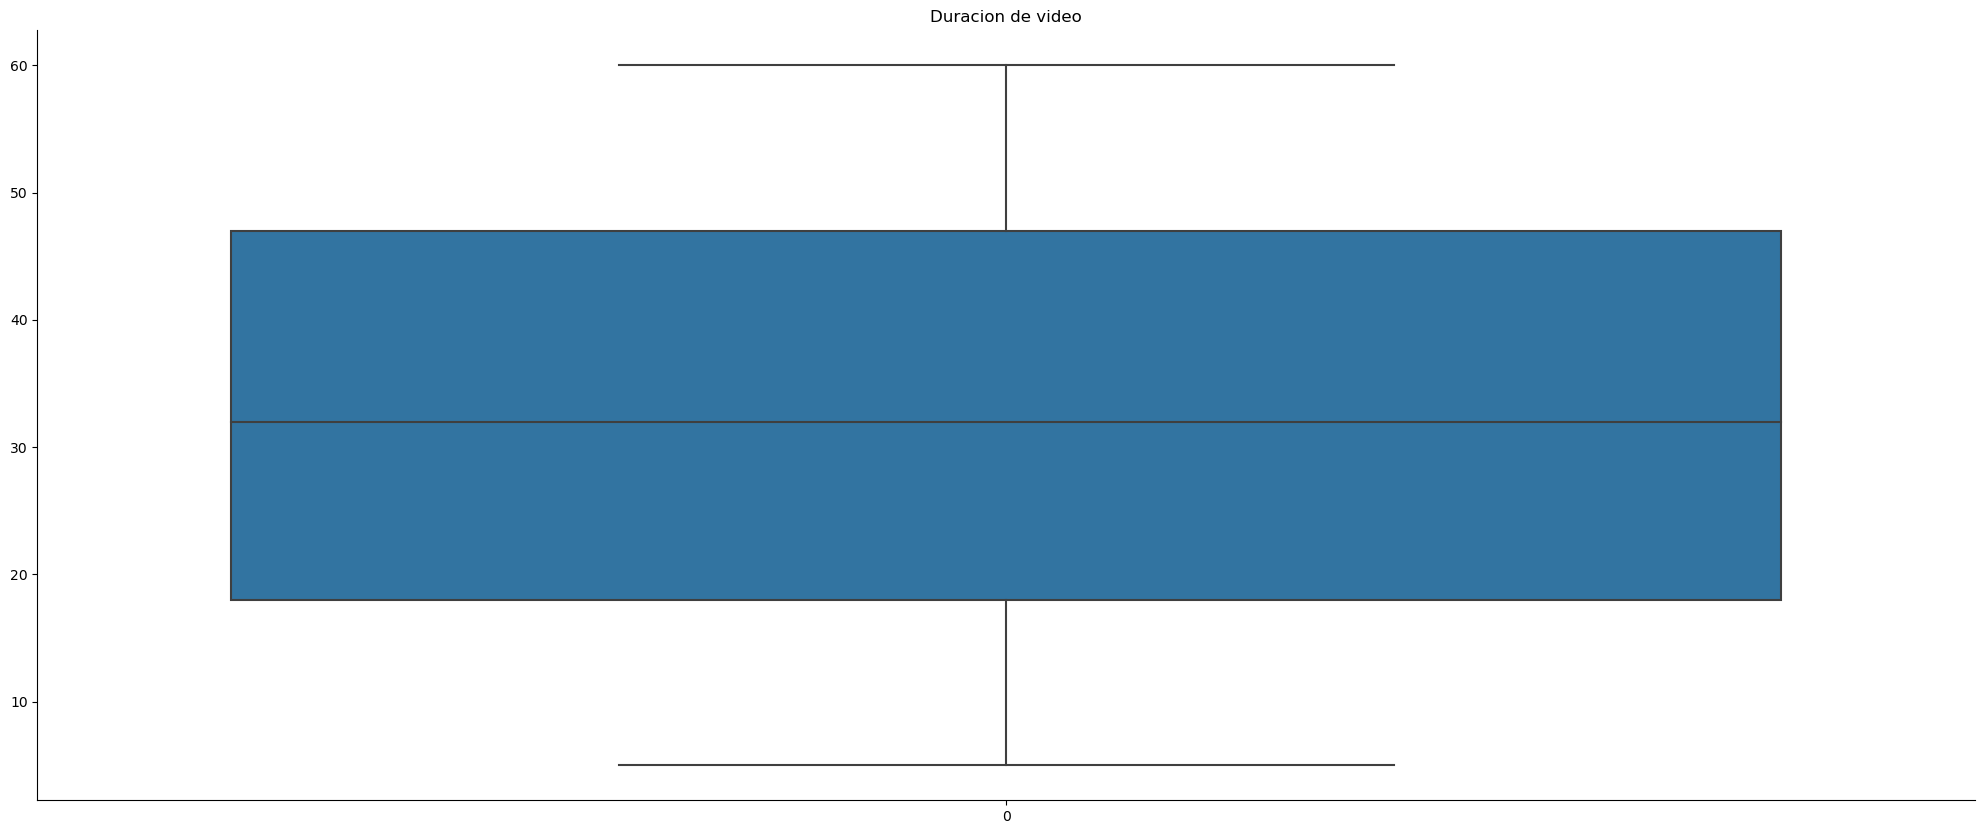

In [22]:
sns.boxplot(tik_tok['duracion_video_seg'])
plt.title('Duracion de video')
sns.despine()

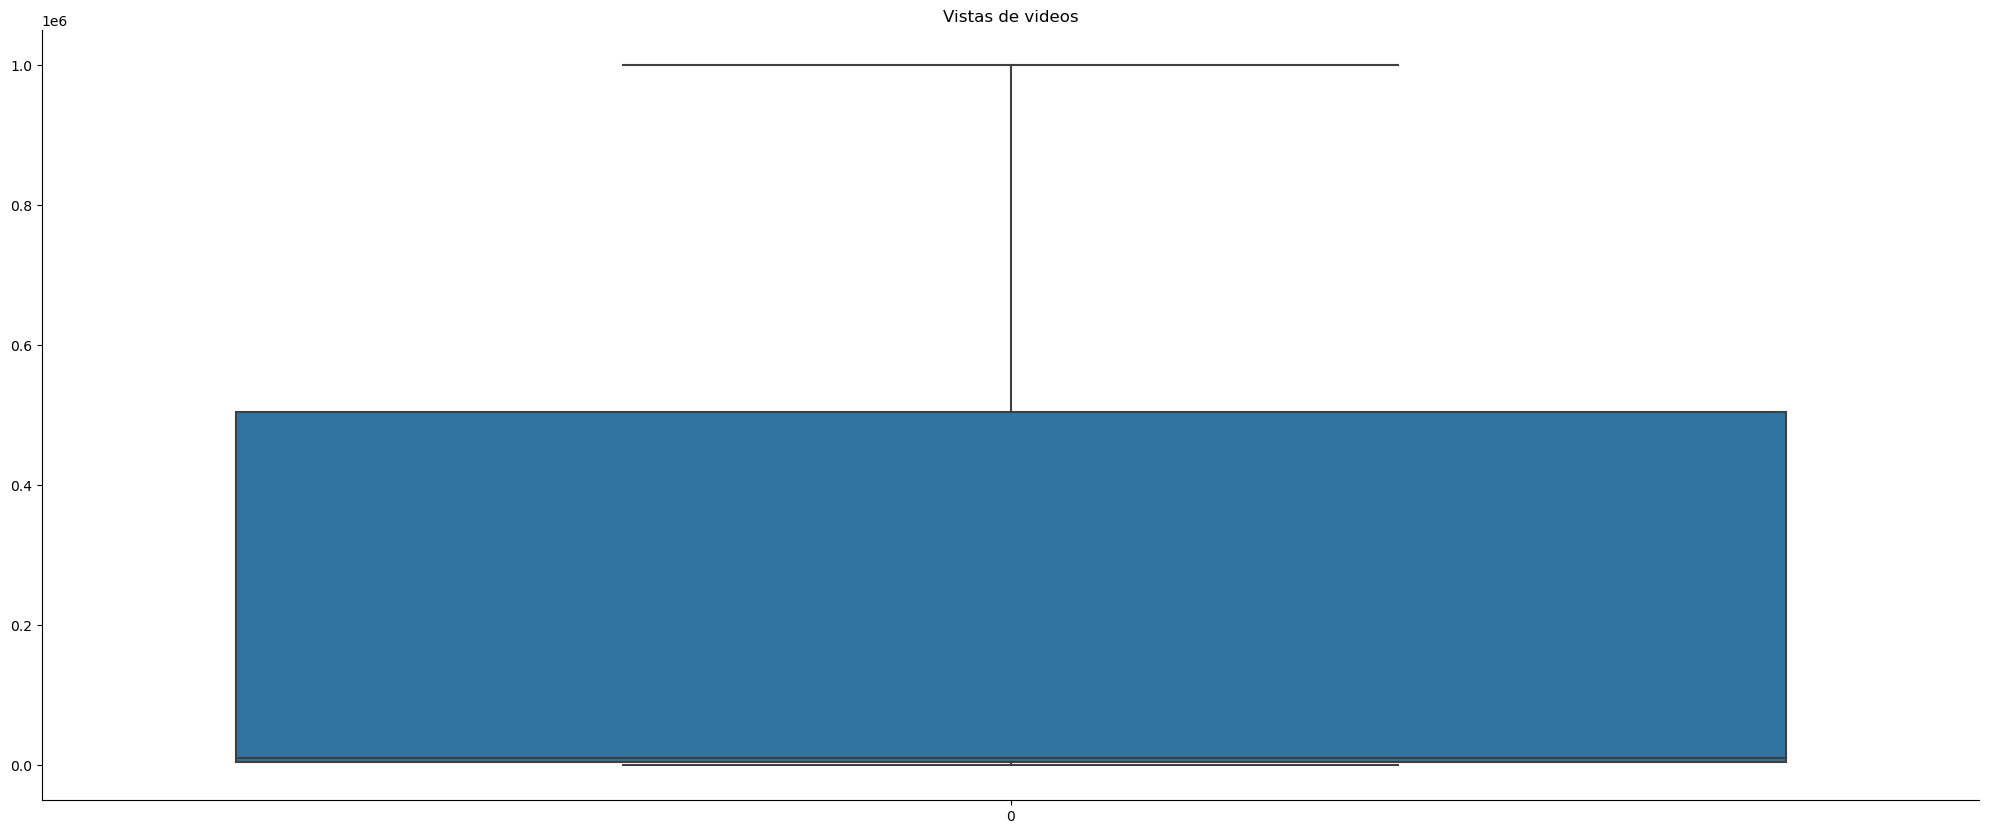

In [23]:
sns.boxplot(tik_tok['suma_vistas_video'])
plt.title('Vistas de videos')
sns.despine()

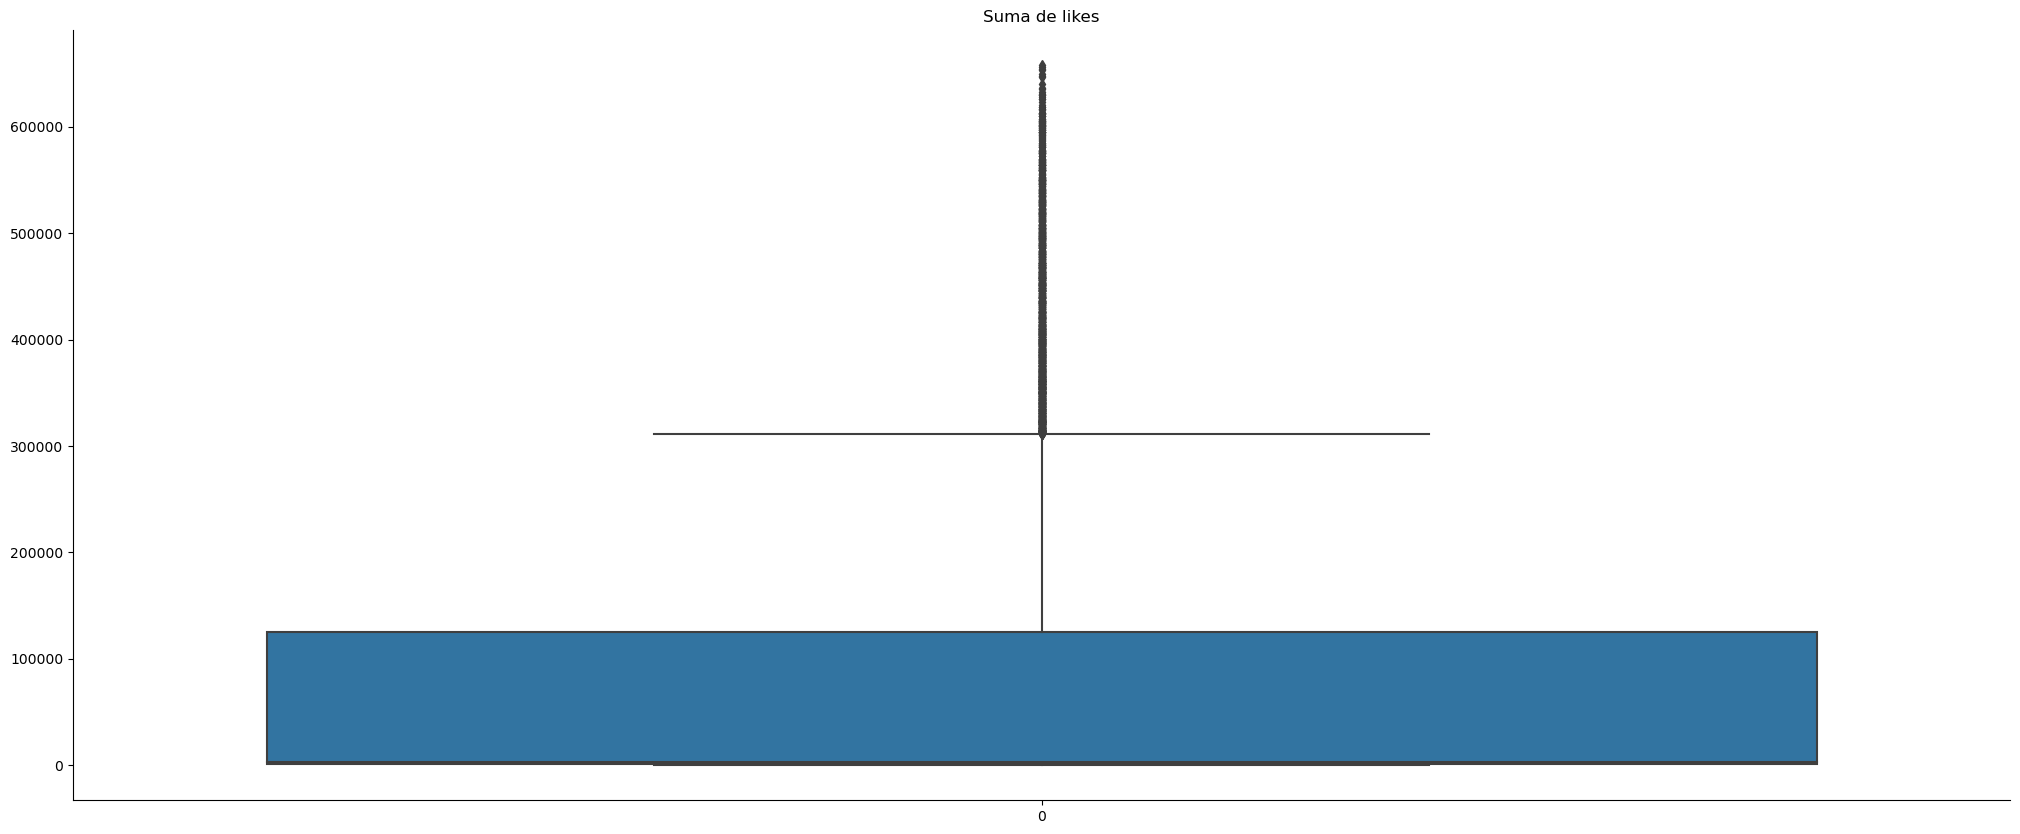

In [24]:
sns.boxplot(tik_tok['suma_likes_video'])
plt.title('Suma de likes')
sns.despine()

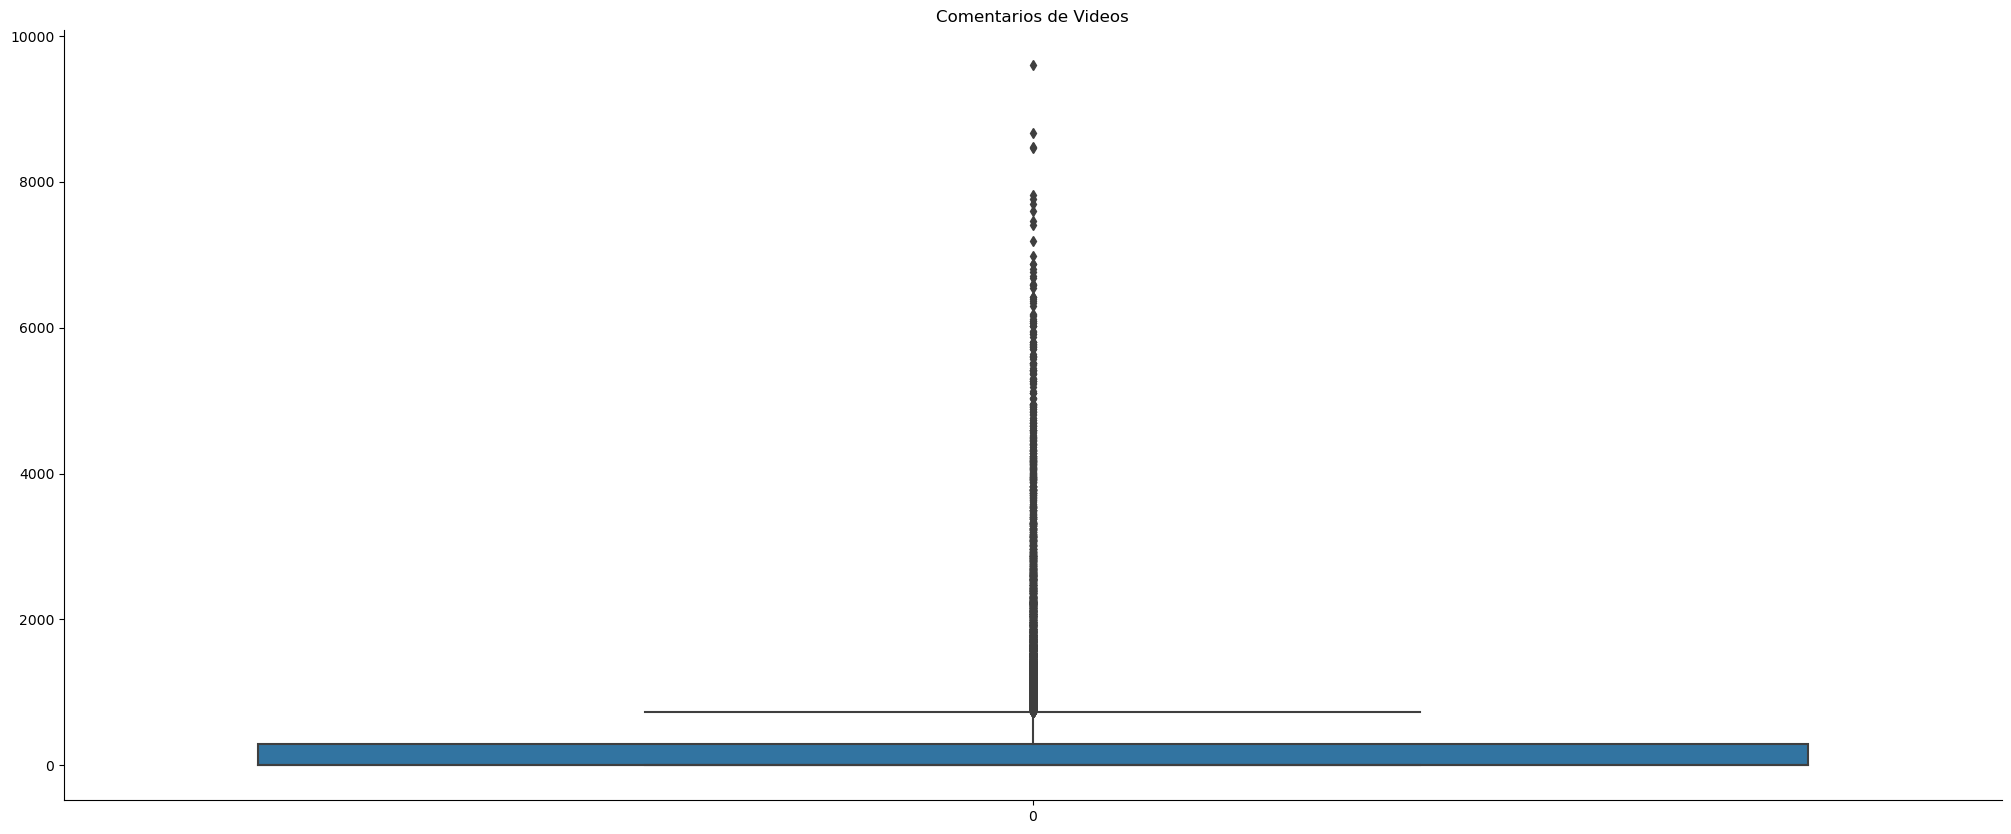

In [25]:
sns.boxplot(tik_tok['suma_comentarios_video'])
plt.title('Comentarios de Videos')
sns.despine()

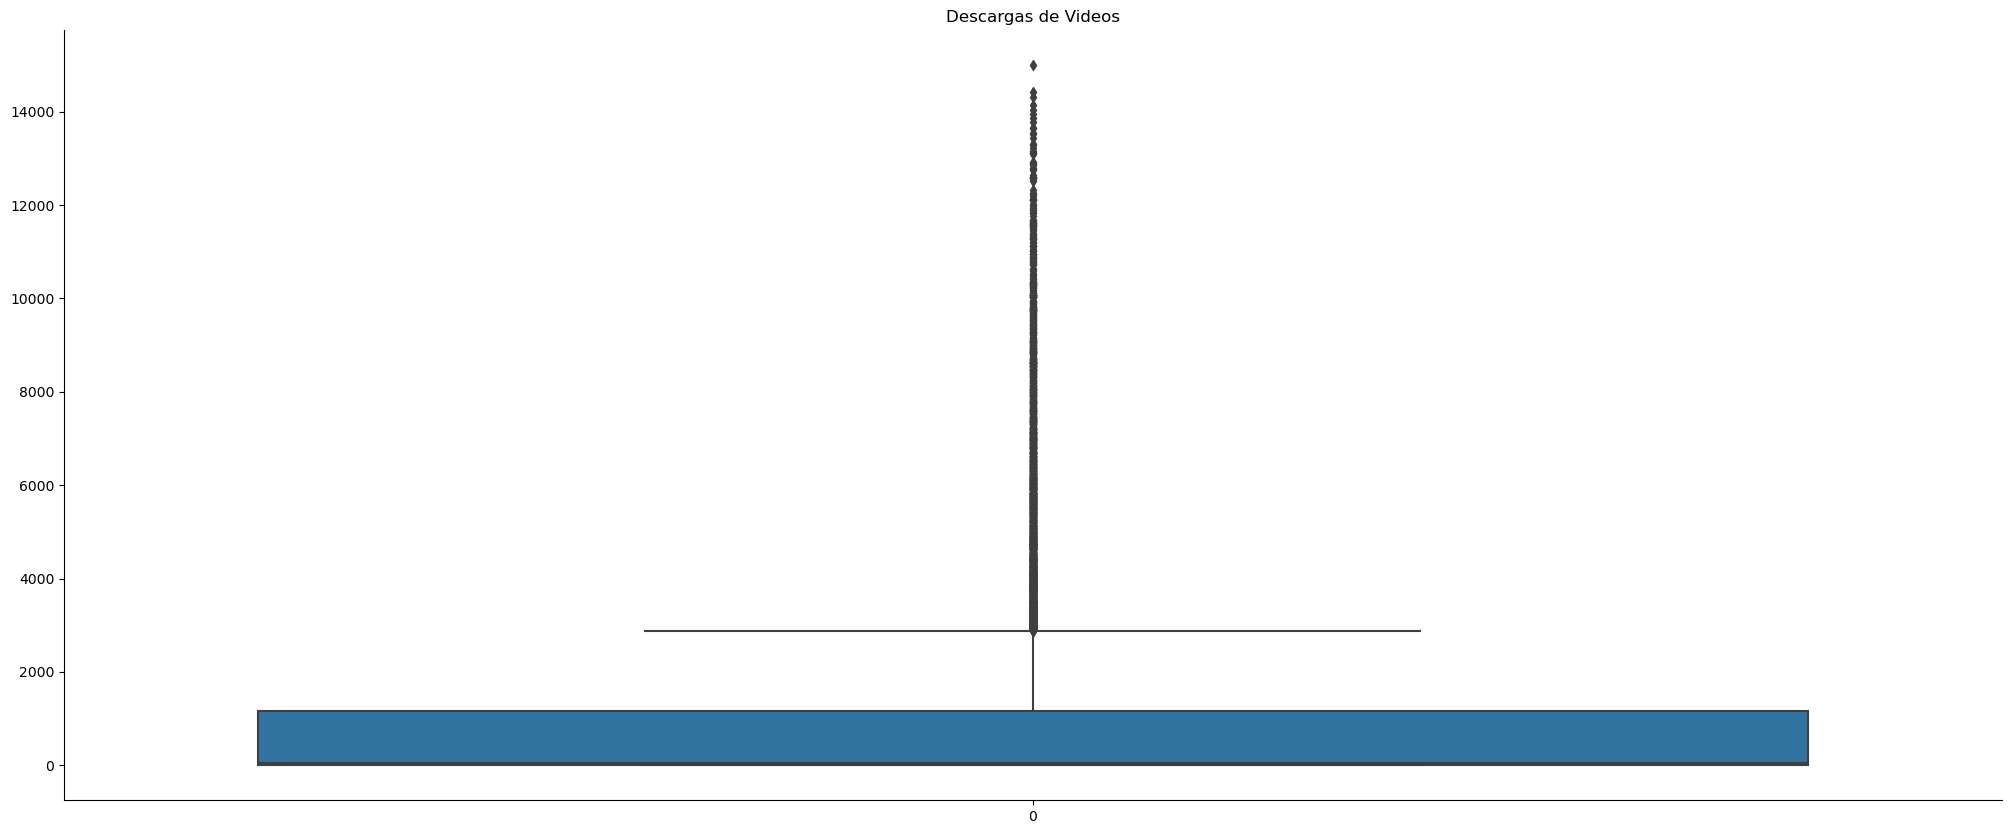

In [26]:
sns.boxplot(tik_tok['suma_descargas_video'])
plt.title('Descargas de Videos')
sns.despine()

In [27]:
conteo_colum = ['suma_vistas_video',
              'suma_likes_video',
              'suma_share_video',
              'suma_descargas_video',
              'suma_comentarios_video',
              ]

for column in conteo_colum:
    q1 = tik_tok[column].quantile(0.25)
    q3 = tik_tok[column].quantile(0.75)
    iqr = q3 - q1
    median = tik_tok[column].median()
    outlier_threshold = median + 1.5*iqr

    # Contar la cantidad de valores
    outlier_conteo = (tik_tok[column] > outlier_threshold).sum()
    print(f'Numbero de outliers, {column}:', outlier_conteo)

Numbero de outliers, suma_vistas_video: 2343
Numbero de outliers, suma_likes_video: 3468
Numbero de outliers, suma_share_video: 3732
Numbero de outliers, suma_descargas_video: 3733
Numbero de outliers, suma_comentarios_video: 3882


#### En este conjunto de datos de TikTok, los valores de las variables de conteo no siguen una distribución normal. Están fuertemente sesgados hacia la derecha. Una forma de modificar el umbral para detectar outliers es calculando la mediana para cada variable y luego sumando 1.5 veces el rango intercuartil (IQR, por sus siglas en inglés). Esto resulta en un umbral que, en este caso, es mucho más bajo de lo que sería si se utilizara el tercer cuartil.

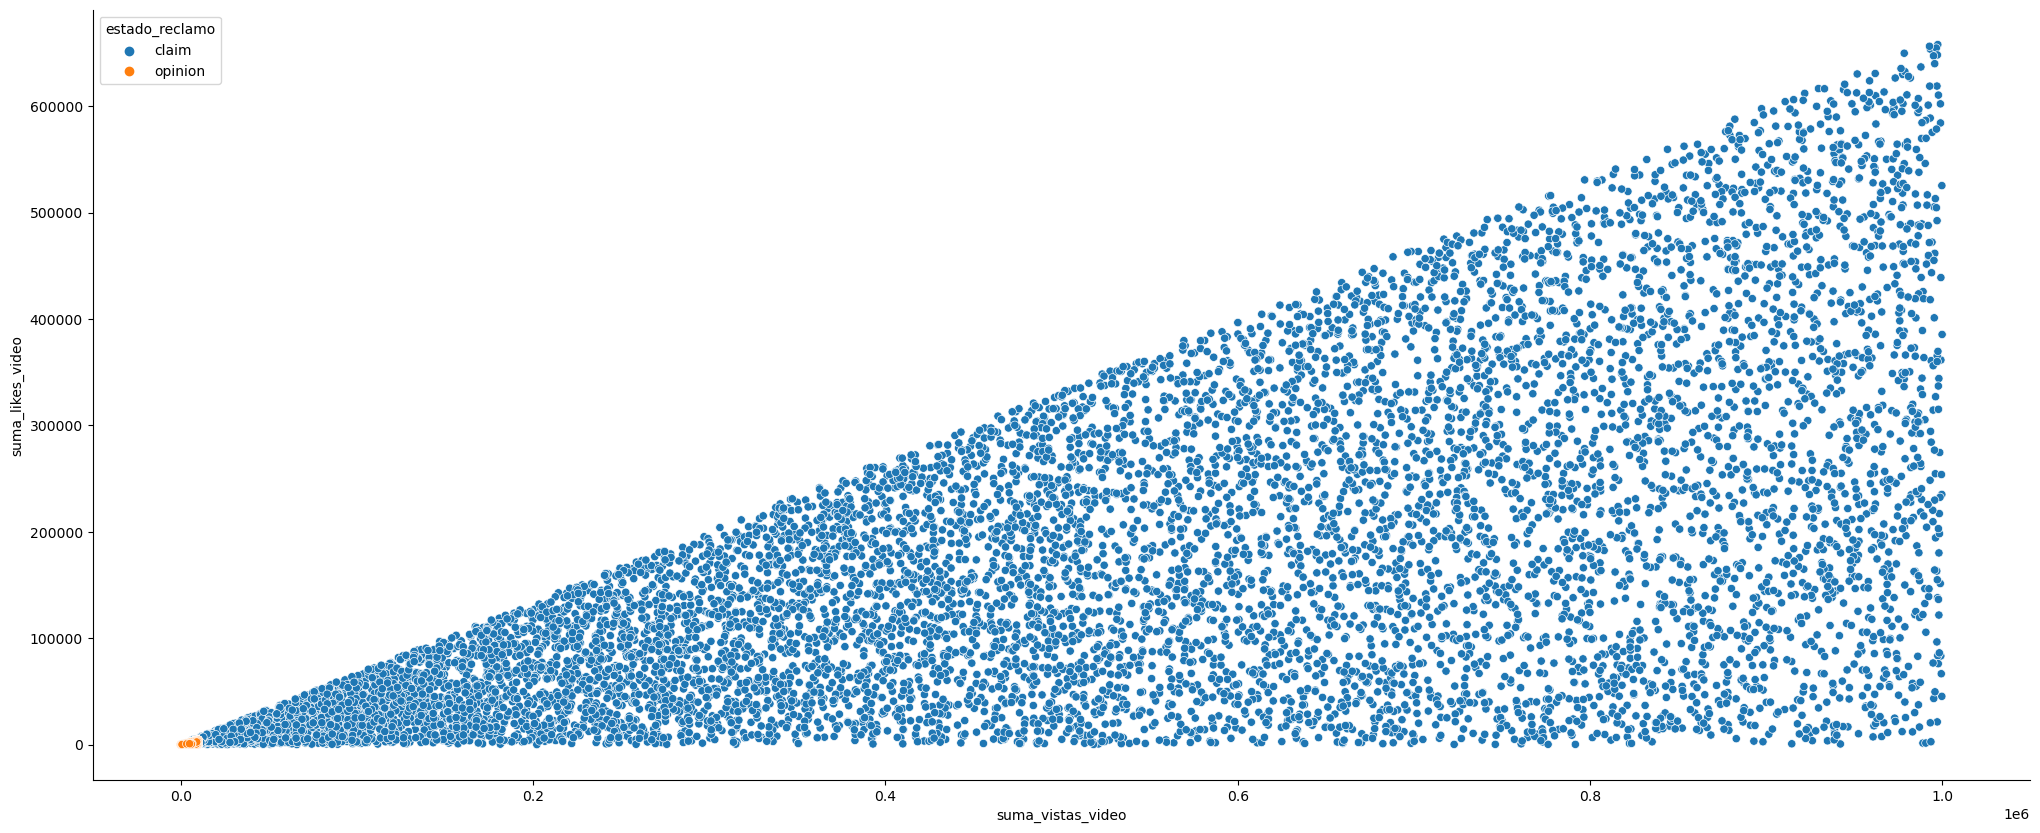

In [28]:
#scatterplot
plt.figure()
sns.scatterplot(x="suma_vistas_video", y="suma_likes_video",data=tik_tok, hue = "estado_reclamo")
sns.despine()
plt.show();


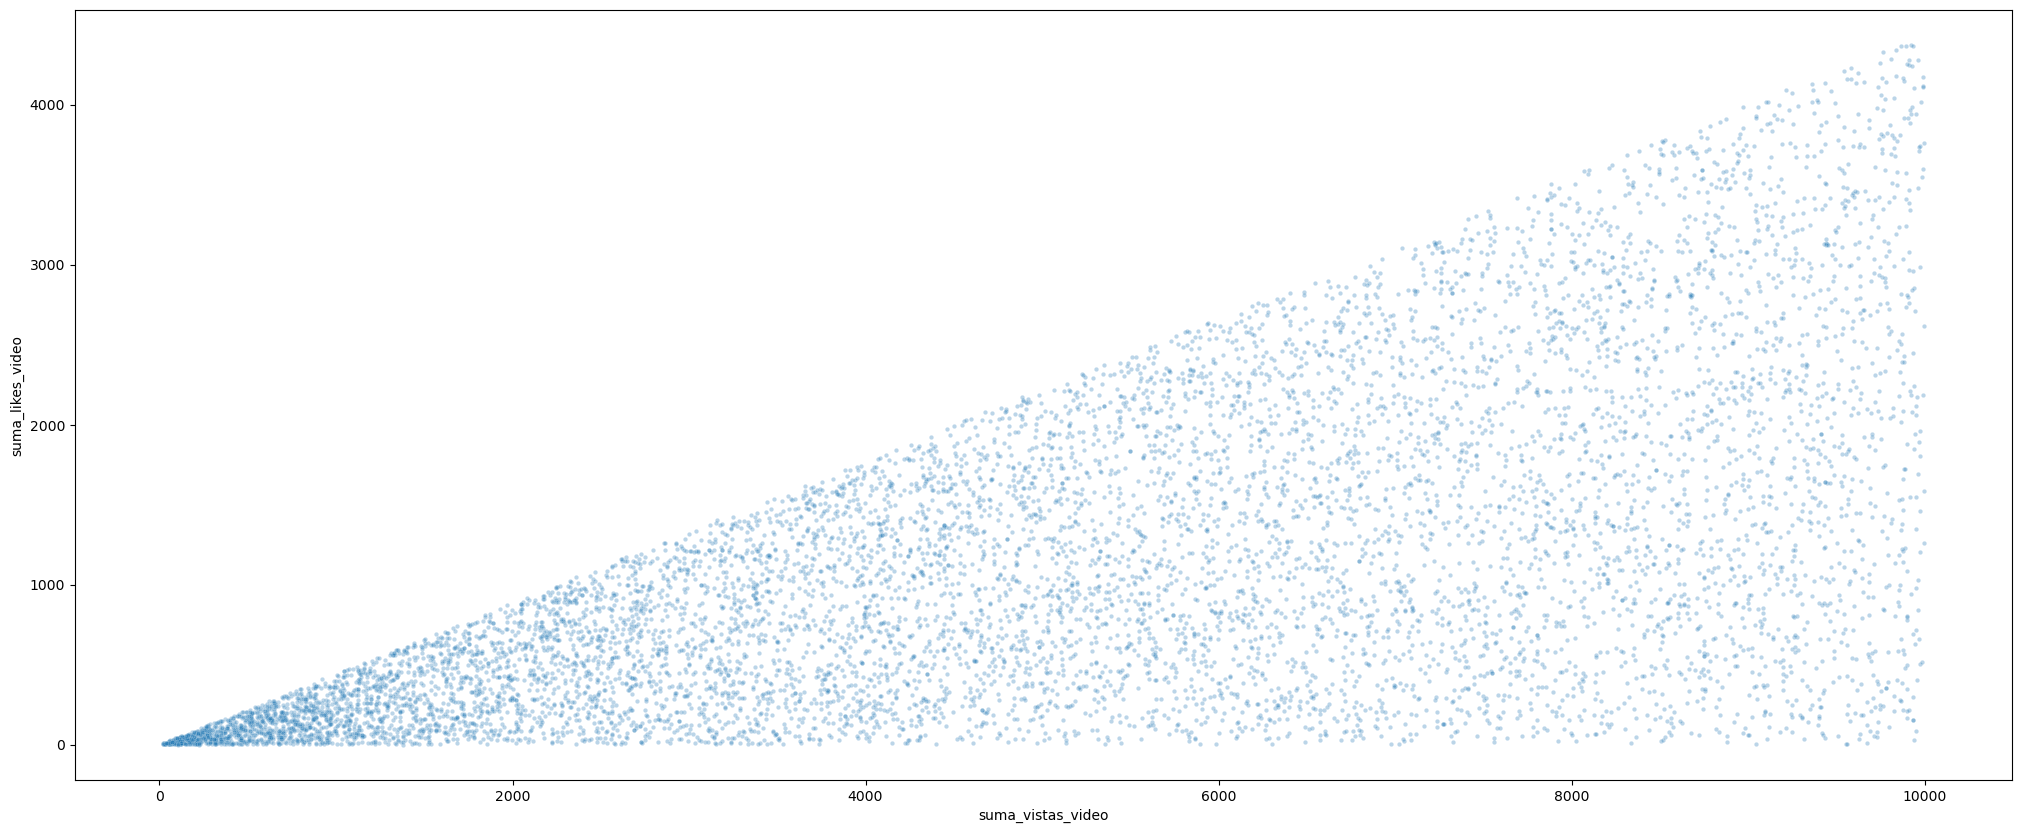

In [29]:

opinion = tik_tok[tik_tok["estado_reclamo"]=='opinion']
sns.scatterplot(x=opinion["suma_vistas_video"], y=opinion["suma_likes_video"],
                 s=10, alpha=.3)
plt.show()